In [28]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hanspach_p\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
# Sample emails
emails = [
    "Our latest ventilator model offers cutting-edge technology designed to improve patient care. It's equipped with advanced monitoring features and ensures reliable performance in critical situations. We recommend scheduling a demo to see its capabilities firsthand. Feel free to reach out if you have any questions. We look forward to hearing from you soon.",
    "Thank you for considering Ventilators Inc. for your medical equipment needs. Our ventilators are known for their durability and efficiency in healthcare settings. We offer competitive pricing and excellent customer support to ensure your satisfaction. Let us know how we can assist you further. Your trust in our products means a lot to us.",
    "We are excited to announce our participation in the upcoming healthcare conference. Visit our booth to learn about our latest innovations in ventilator technology. Our team will be available to answer your questions and provide demonstrations. Don't miss this opportunity to discover how Ventilators Inc. can support your facility's needs.",
    "Have you explored our comprehensive ventilator maintenance plans? Regular servicing is crucial for optimal performance and longevity of your equipment. Our certified technicians are trained to handle all maintenance tasks efficiently. Schedule your service today to keep your operations running smoothly. We are here to help you every step of the way.",
    "Join us for an exclusive webinar on advancements in ventilator technology. This session will cover new features and best practices for maximizing patient care. Register now to secure your spot and gain valuable insights from industry experts. We look forward to your participation.",
    "We understand the importance of flexibility in healthcare procurement. That's why we offer customizable financing options tailored to your budget and operational needs. Whether you're upgrading your current equipment or expanding your facility, we have solutions that fit. Contact our sales team to discuss your financing options today.",
    "Our ventilator training program is designed to empower your staff with essential knowledge and skills. From basic operation to troubleshooting, our training sessions cover it all. Equip your team with the expertise they need to deliver superior patient care. Register today and invest in your staff's professional development.",
    "We value your feedback on our ventilator products. Your insights help us enhance our offerings and better serve your needs. Please take a moment to complete our survey. As a token of appreciation, participants will receive a discount on their next purchase. Your input is invaluable to us.",
    "Ventilators Inc. is committed to sustainability and reducing our environmental footprint. Our latest models are designed with energy-efficient features to minimize power consumption without compromising performance. Join us in our mission for a greener future. Together, we can make a difference.",
    "Explore our wide range of ventilator accessories designed to optimize functionality and improve patient outcomes. From humidification systems to specialized filters, we have everything you need. Visit our online store to browse our latest offerings and place your order conveniently. Enhance your ventilator setup today.",
    "We are proud to announce the launch of our telehealth support services for ventilator users. Access expert guidance and troubleshooting assistance remotely. Our telehealth platform ensures prompt response and personalized care from our dedicated support team. Stay connected with Ventilators Inc. wherever you are.",
    "Planning your next equipment upgrade? Consider our trade-in program for ventilators. Exchange your old equipment for credit towards new purchases. It's a cost-effective way to modernize your facility's respiratory care capabilities. Contact us to learn more about eligibility and trade-in values.",
    "As part of our commitment to customer satisfaction, we offer 24/7 technical support for all Ventilators Inc. products. Our knowledgeable support team is available around the clock to address your inquiries and resolve any issues promptly. Your peace of mind is our priority.",
    "Stay informed with our monthly newsletter featuring industry insights, product updates, and special promotions. Subscribe today to receive valuable information directly to your inbox. Don't miss out on the latest news from Ventilators Inc. Sign up now and stay connected.",
    "We are dedicated to advancing ventilator technology through continuous research and development. Our team of engineers is focused on innovating solutions that meet evolving healthcare challenges. Join us in shaping the future of respiratory care with Ventilators Inc.",
    "Discover the reliability of Ventilators Inc. products with our extended warranty options. Protect your investment and ensure uninterrupted patient care with our comprehensive warranty coverage. Learn more about our warranty plans and choose the best option for your facility.",
    "Are you attending the healthcare symposium next month? Visit our booth to experience firsthand our latest ventilator models and innovative features. Our team will be available to provide demonstrations and answer your questions. We look forward to seeing you there.",
    "Enhance patient comfort and care with our range of ventilator accessories. From ergonomically designed circuits to intuitive user interfaces, we offer solutions that prioritize patient well-being. Explore our accessory catalog and elevate your ventilator setup today.",
    "Congratulations on your recent purchase of Ventilators Inc. equipment. We appreciate your trust in our products. Don't forget to register your ventilators online to activate your warranty and access exclusive benefits. Thank you for choosing Ventilators Inc. for your healthcare needs.",
    "Invest in the future of healthcare with Ventilators Inc. Our commitment to quality, reliability, and innovation sets us apart in the industry. Explore our product lineup and discover why healthcare professionals trust Ventilators Inc. for superior respiratory care solutions.",
    "Join our community of healthcare professionals dedicated to improving patient outcomes with Ventilators Inc. Connect with peers, share insights, and stay informed about industry trends. Follow us on social media and be part of the conversation.",
    "We understand the challenges healthcare providers face in delivering exceptional patient care. That's why we offer tailored solutions and support to meet your specific needs. Partner with Ventilators Inc. and experience personalized service that makes a difference.",
    "Need assistance with ventilator selection or configuration? Our experienced sales team is here to help. Contact us today to discuss your requirements and receive expert guidance on choosing the right ventilator for your healthcare facility.",
    "Stay ahead in respiratory care with our training workshops led by industry experts. Gain hands-on experience and practical insights into ventilator operation and maintenance. Register for our upcoming workshop and expand your knowledge base.",
    "Explore our educational resources on respiratory therapy and ventilator management. From instructional videos to informative articles, we provide valuable content to support healthcare professionals in delivering optimal patient care.",
    "Discover the versatility of Ventilators Inc. products with our customizable solutions for diverse healthcare settings. Whether you're in a hospital, clinic, or home care environment, we have ventilators that adapt to your needs.",
    "Looking for cost-effective ventilator solutions? Take advantage of our special promotions and bundle offers. Save on your equipment purchases without compromising on quality or performance. Contact us today to explore our current deals.",
    "We appreciate your interest in Ventilators Inc. products. Our team is dedicated to providing exceptional service and support throughout your purchasing journey. Let us know how we can assist you further. We're here to help you make informed decisions.",
    "Thank you for attending our recent webinar on ventilator technology trends. We hope you found the session informative and insightful. Stay tuned for more educational opportunities from Ventilators Inc. as we continue to share industry expertise.",
    "Explore our commitment to sustainability with eco-friendly ventilator solutions. Reduce your carbon footprint while maintaining high standards of patient care. Join us in promoting environmental stewardship with Ventilators Inc.",
    "As a leader in respiratory care, Ventilators Inc. is committed to patient safety and comfort. Our ventilators undergo rigorous testing to ensure reliability and performance in healthcare settings. Trust Ventilators Inc. for superior respiratory solutions.",
    "We are excited to introduce our latest ventilator model designed for enhanced mobility and ease of use. Perfect for both clinical and transport settings, this model combines advanced features with user-friendly design. Schedule a demo today and experience its capabilities firsthand.",
    "We are thrilled to celebrate Ventilators Inc.'s 20th anniversary serving healthcare professionals worldwide. Thank you for your continued trust and partnership. Here's to many more years of innovation and excellence in respiratory care.",
    "Explore our ventilator maintenance tips to ensure optimal performance and longevity of your equipment. Regular upkeep is essential for patient safety and operational efficiency. Visit our website for maintenance guidelines and best practices.",
    "Are you looking to upgrade your ventilator fleet? Take advantage of our trade-in program and receive credit towards new equipment purchases. It's a convenient and cost-effective way to enhance your respiratory care capabilities.",
    "Discover our commitment to customer satisfaction with hassle-free returns and exchanges on Ventilators Inc. products. We stand behind the quality and reliability of our equipment. Contact us for assistance with returns or warranty claims.",
    "Stay informed about the latest advancements in ventilator technology with our informative blog posts. From industry trends to product innovations, our blog provides valuable insights for healthcare professionals.",
    "We are dedicated to supporting healthcare providers with reliable ventilator solutions tailored to their unique needs. Partner with Ventilators Inc. and experience excellence in respiratory care.",
    "Join us for an upcoming healthcare workshop focused on ventilator management and patient care. Gain practical skills and knowledge from industry experts. Register now and secure your spot at this educational event.",
    "Thank you for your recent inquiry about our ventilator models. We appreciate your interest in Ventilators Inc. products. Our team is here to answer any questions you may have and assist with your purchasing decision.",
    "Stay connected with Ventilators Inc. on social media for the latest company news, product updates, and healthcare insights. Follow us today and join the conversation.",
    "Are you attending the healthcare conference next month? Visit our booth to discover our comprehensive range of ventilator solutions. Our team looks forward to meeting you and discussing your healthcare facility's needs.",
    "Enhance patient care with our ventilator accessories designed to optimize performance and comfort. From tubing sets to filters, we offer solutions that meet the highest standards of quality and reliability.",
    "Experience the reliability of Ventilators Inc. products with our extended warranty options. Protect your investment and ensure continuous patient care with our comprehensive warranty coverage.",
    "Explore our educational resources on ventilator technology and respiratory therapy. We provide valuable insights and training materials to support healthcare professionals in delivering superior patient care.",
    "We are committed to delivering innovative ventilator solutions that prioritize patient safety and comfort. Join us in advancing respiratory care with Ventilators Inc.'s state-of-the-art equipment.",
    "Discover the benefits of partnering with Ventilators Inc. for your healthcare facility's respiratory needs. Our team is dedicated to providing personalized service and support to meet your specific requirements.",
    "Looking for reliable ventilator solutions? Trust Ventilators Inc. for industry-leading equipment and exceptional customer service. Contact us today to discuss your ventilator needs with our experienced team.",
    "Learn about our commitment to sustainability with eco-friendly ventilator options designed to reduce environmental impact. Join us in promoting sustainable healthcare practices with Ventilators Inc.",
    "Thank you for attending our recent webinar on ventilator management best practices. We hope you found the session informative and valuable. Stay tuned for more educational opportunities from Ventilators Inc.",
    "Explore our ventilator training programs designed to equip healthcare professionals with essential skills and knowledge. From basic operation to advanced troubleshooting, we offer comprehensive training options.",
    "Join our community of healthcare professionals dedicated to advancing patient care with Ventilators Inc.'s innovative ventilator solutions. Connect with peers and share insights on respiratory therapy.",
    "Discover our latest ventilator models designed for reliability and performance in healthcare settings. Schedule a demo today and experience the quality of Ventilators Inc. products firsthand.",
    "Celebrate with Ventilators Inc. as we mark a milestone in respiratory care innovation. Thank you for your continued support and trust in our products. Here's to many more years of excellence.",
    "Explore our range of ventilator accessories designed to enhance patient comfort and care. From ergonomic designs to advanced features, we offer accessories that meet your facility's needs.",
    "Stay informed about industry trends and product updates with our monthly newsletter. Subscribe today and receive valuable insights from Ventilators Inc. directly to your inbox.",
    "We are committed to delivering superior ventilator solutions backed by exceptional customer service. Partner with Ventilators Inc. for your healthcare facility's respiratory care needs.",
    "Attend our upcoming webinar on ventilator technology advancements and best practices. Register now and gain insights from industry experts at Ventilators Inc.",
    "Thank you for choosing Ventilators Inc. for your ventilator needs. We appreciate your trust in our products and services. Let us know how we can further support your healthcare facility.",
    "Connect with Ventilators Inc. on social media to stay updated on company news, product launches, and healthcare insights. Follow us today and join the conversation.",
    "Visit our booth at the healthcare expo to discover our latest ventilator innovations. Our team looks forward to meeting you and discussing your facility's respiratory care requirements.",
    "Let's grab dinner at the new Italian place downtown after work tomorrow. They have great pasta dishes and a cozy atmosphere. I've made a reservation for 6:30 pm. Who's in?",
    "Join us for drinks at the rooftop bar this Friday to celebrate a successful quarter. It's a great opportunity to unwind and socialize outside of the office. See you there!",
    "We're planning a team bowling night next Wednesday to build camaraderie and have some fun together. Please RSVP by Monday so we can finalize the arrangements.",
    "How about a game of mini golf after work next Thursday? It's a fun way to relax and enjoy some friendly competition. Let me know if you're interested!",
    "Join us for a casual lunch at the food truck park on Friday. They have a variety of options and it's a great way to support local vendors. Hope to see you there!",
    "Let's organize a group hike this weekend to explore the trails nearby. It's a chance to get outdoors, enjoy nature, and recharge for the week ahead. Who's up for it?",
    "We're planning a team outing to the baseball game next Saturday. It'll be a great opportunity to cheer on our local team and enjoy a day out with colleagues. Tickets are limited, so RSVP soon!",
    "How about a picnic at the park next Friday afternoon? Bring your favorite dish to share and enjoy some fresh air and good company. Let me know if you can make it!",
    "Join us for a cooking class after work next Tuesday. We'll learn to make some delicious dishes together and enjoy the fruits of our labor. Limited spots available, so RSVP early!",
    "Let's unwind with a game night at the office this Thursday. We'll have board games, snacks, and friendly competition. Feel free to bring your favorite game to share!",
    "We're planning a team outing to the local brewery next Friday evening. It's a great chance to relax, try some new brews, and socialize with colleagues outside of work. Hope to see you there!",
    "How about a movie night after work next Wednesday? We'll grab popcorn, watch a new release, and enjoy some downtime together. Let me know if you're interested!",
    "Join us for a fitness class after work next Monday. It's a great way to stay active and healthy together as a team. All fitness levels welcome!",
    "Let's organize a team karaoke night this Friday to showcase our hidden talents. It'll be a fun way to unwind and bond over music. Hope to see you there!",
    "We're planning a team beach day next Saturday to soak up the sun and enjoy some beach games. Bring your sunscreen and beach gear. RSVP by Wednesday!",
    "How about a bike ride after work next Tuesday? We'll explore the bike trails nearby and enjoy some fresh air and exercise. Let me know if you're interested!",
    "Join us for a pottery painting session after work next Thursday. It's a creative way to relax and express ourselves. Limited spots available, so RSVP early!",
    "Let's organize a team picnic at the botanical gardens next Friday afternoon. Enjoy nature, good food, and great company. Let me know if you can make it!",
    "We're planning a team outing to the escape room next Saturday. It's a thrilling challenge that requires teamwork and problem-solving skills. RSVP soon to secure your spot!",
    "How about a sushi-making class after work next Monday? Learn to roll sushi like a pro and enjoy delicious creations together. Limited spots available, so RSVP early!",
    "Join us for a wine tasting event after work next Wednesday. Discover new wines and enjoy a relaxing evening with colleagues. Let me know if you're interested!",
    "Let's unwind with a spa day this Friday afternoon. Treat yourself to relaxation and rejuvenation. Limited spots available, so RSVP early!",
    "We're planning a team outing to the comedy club next Saturday evening. It's a great chance to laugh together and enjoy a night out. RSVP soon to secure your ticket!",
    "How about a team building scavenger hunt after work next Thursday? Explore the city and solve clues together as a team. Let me know if you're up for the challenge!",
    "Join us for a photography walk this Sunday morning. Capture the beauty of the city and enjoy a leisurely stroll with colleagues. RSVP by Friday to join!",
    "Let's organize a team brunch this Saturday morning at the new café downtown. Enjoy delicious food and great conversation. Hope to see you there!",
    "We're planning a team outing to the art museum next Sunday. Explore exhibits and appreciate creativity together as a team. RSVP soon to join us!",
    "How about a team ice cream social this Friday afternoon? Indulge in sweet treats and enjoy a casual get-together with colleagues. Let me know if you're interested!",
    "Join us for a board game tournament after work next Tuesday. Test your skills and compete for the title of champion. Limited spots available, so RSVP early!",
    "Let's unwind with a yoga session this Thursday evening. Stretch, relax, and rejuvenate with colleagues. All levels welcome. Hope to see you there!",
    "We're planning a team outing to the botanical gardens next Saturday. Explore lush gardens and enjoy a relaxing day outdoors. RSVP soon to secure your spot!",
    "How about a team hiking trip this Sunday morning? Discover scenic trails and enjoy the beauty of nature with colleagues. Let me know if you're interested!",
    "Join us for a cooking competition after work next Wednesday. Showcase your culinary skills and enjoy friendly competition. Limited spots available, so RSVP early!",
    "Let's organize a team barbecue this Friday evening. Enjoy grilled favorites and good company. Bring your appetite and RSVP by Wednesday!",
    "We're planning a team outing to the zoo next Saturday. Explore wildlife exhibits and enjoy a day of fun and learning. RSVP soon to join us!",
    "How about a team painting workshop after work next Monday? Unleash your creativity and create artwork with colleagues. Limited spots available, so RSVP early!",
    "Join us for a river cruise this Sunday afternoon. Relax on deck, enjoy scenic views, and socialize with colleagues. RSVP by Friday to secure your spot!",
    "Let's unwind with a movie marathon this Friday night. Grab your popcorn and enjoy a selection of films with colleagues. Let me know if you're interested!",
    "We're planning a team outing to the amusement park next Saturday. Ride thrilling attractions and enjoy a day of excitement with colleagues. RSVP soon to join us!",
    "How about a team gardening session after work next Wednesday? Plant flowers and vegetables together and enjoy time outdoors with colleagues. Let me know if you're interested!",
    "Join us for a team book club discussion this Sunday afternoon. Share insights on the latest book and enjoy stimulating conversation with colleagues. RSVP by Friday to join!",
    "Let's organize a team beach volleyball game this Saturday morning. Enjoy friendly competition and soak up the sun with colleagues. Hope to see you there!",
    "We're planning a team outing to the aquarium next Sunday. Discover marine life and enjoy a day of exploration with colleagues. RSVP soon to secure your spot!",
    "How about a team pottery workshop after work next Tuesday? Create pottery masterpieces and enjoy a creative evening with colleagues. Limited spots available, so RSVP early!",
    "Join us for a scenic hike this Saturday morning. Explore nature trails and enjoy panoramic views with colleagues. RSVP by Thursday to join!",
    "Let's unwind with a wine and cheese tasting this Friday evening. Sample a variety of wines and gourmet cheeses with colleagues. Limited spots available, so RSVP early!",
    "We're planning a team outing to the science museum next Sunday. Explore interactive exhibits and enjoy a day of discovery with colleagues. RSVP soon to join us!",
    "How about a team beach cleanup next Saturday morning? Give back to the community and enjoy time outdoors with colleagues. Let me know if you're interested!",
    "Join us for a team trivia night this Friday. Test your knowledge and compete for prizes with colleagues. Let me know if you're up for the challenge!",
    "Let's organize a team picnic at the park this Saturday afternoon. Enjoy outdoor games, delicious food, and good company. Hope to see you there!",
    "We're planning a team outing to the concert next Friday evening. Enjoy live music and celebrate the end of the week with colleagues. RSVP soon to secure your ticket!",
    "How about a team paddleboarding session this Sunday morning? Glide across the water and enjoy scenic views with colleagues. RSVP by Friday to secure your spot!",
    "Join us for a pottery painting workshop after work next Wednesday. Unleash your creativity and enjoy a relaxing evening with colleagues. Limited spots available, so RSVP early!",
    "Let's unwind with a picnic at the botanical gardens this Saturday afternoon. Enjoy nature, good food, and great company. Let me know if you can make it!",
    "We're planning a team outing to the farmers' market next Sunday morning. Explore local vendors and enjoy fresh produce with colleagues. RSVP soon to join us!",
    "How about a team movie night this Friday? Grab your popcorn and enjoy a screening of a new release with colleagues. Let me know if you're interested!",
    "Join us for a hiking adventure this Sunday morning. Discover scenic trails and enjoy the outdoors with colleagues. RSVP by Friday to join!",
    "Let's organize a team cooking class after work next Tuesday. Learn new recipes and enjoy delicious food together. Limited spots available, so RSVP early!",
    "We're planning a team outing to the zoo next Saturday. Explore animal exhibits and enjoy a day of fun and learning with colleagues. RSVP soon to secure your spot!"
    "Let's meet at the local pub after work for drinks and unwind from a busy week. It's a great opportunity to relax and socialize with the team. Looking forward to seeing everyone there!",
    "How about we organize a dinner outing at the new Italian restaurant downtown? They have a cozy ambiance and delicious food. Let me know your availability so we can plan accordingly.",
    "Join us for a game of bowling after work this Friday. It's a fun way to bond outside the office and showcase your bowling skills. Reply with your interest and we'll finalize the details.",
    "Let's kick off the weekend with a happy hour at the rooftop bar nearby. Enjoy scenic views and refreshing cocktails while mingling with colleagues. Don't miss out on the fun!",
    "Calling all sports enthusiasts! We're putting together a friendly soccer match after work next week. Whether you're a seasoned player or a beginner, everyone is welcome to join in the game.",
    "Join us for a casual dinner at the sushi restaurant down the street. It's a chance to enjoy good food and conversation after a productive week. Reply if you'd like to join!",
    "How about a team outing to the comedy club on Thursday evening? Laugh your stress away with hilarious stand-up acts and enjoy some good laughs with your colleagues.",
    "Let's plan a group hike this Saturday morning at the nearby trails. It's a great way to start the weekend on a healthy note and enjoy the outdoors together. Reply if you're interested!",
    "Join us for a relaxing evening of mini-golf after work this Friday. Challenge your colleagues to a friendly game and enjoy some light-hearted competition. Reply to RSVP.",
    "We're organizing a team outing to the baseball game next Friday. Cheer on our local team and enjoy the excitement of live sports with your coworkers. Don't miss this chance!",
    "Let's unwind with a wine tasting event after work next Wednesday. Sample a variety of wines and socialize with your teammates in a relaxed atmosphere. Reply if you're interested.",
    "Join us for a casual barbecue at the park this Sunday afternoon. It's a family-friendly event, so feel free to bring your loved ones along. Let us know if you can make it!",
    "How about a team picnic by the lake this Saturday? Enjoy the outdoors, games, and good food in a picturesque setting. Reply with your availability so we can finalize the details.",
    "Let's organize a team dinner at the new steakhouse in town next Thursday. Indulge in delicious steaks and catch up with your colleagues over a great meal. RSVP if you'd like to join.",
    "Join us for a round of karaoke after work this Friday. Show off your singing talents or simply enjoy the entertainment with your coworkers. Reply to confirm your attendance!",
    "Let's plan a movie night out at the cinema this Saturday. Watch the latest blockbuster together and unwind after a busy week. Reply if you're interested in joining us.",
    "How about a team outing to the local brewery for a beer tasting event next Wednesday? Sample craft beers and learn about the brewing process with your colleagues. Let us know if you're in!",
    "Join us for a team lunch at the Mexican restaurant around the corner this Friday. Enjoy tasty tacos and burritos while catching up with your coworkers. Reply with your lunch preferences!",
    "Let's organize a board game night after work next Tuesday. Challenge your colleagues to friendly competitions and enjoy some quality time together. Reply to RSVP.",
    "How about we organize a group cooking class this Saturday morning? Learn new culinary skills and enjoy delicious food prepared together with your teammates. Reply if you're interested!",
    "Join us for a sunset cruise on the river this Friday evening. Relax on board, enjoy the scenic views, and socialize with your colleagues over drinks and snacks. Let us know if you can make it!",
    "Let's plan a team outing to the art gallery next Thursday evening. Explore the latest exhibits and appreciate the creativity together with your coworkers. RSVP to join us!",
    "How about a team outing to the escape room challenge next Wednesday? Work together to solve puzzles and test your problem-solving skills with your colleagues. Reply if you're up for the challenge!",
    "Join us for a guided city tour on bikes this Sunday morning. Explore local landmarks and attractions while enjoying a leisurely ride with your coworkers. Reply to reserve your spot!",
    "Let's organize a team brunch at the trendy cafe downtown this Saturday. Indulge in delicious brunch options and enjoy a relaxed morning with your colleagues. RSVP if you'd like to join.",
    "How about a team outing to the concert next Friday night? Enjoy live music and entertainment with your coworkers. Reply with your favorite music genre if you're interested in joining us!",
    "Let's coordinate our pricing strategy with Competitor A to avoid undercutting each other.",
    "Agreeing not to offer discounts could stabilize prices and benefit both our companies.",
    "We should discuss setting a minimum price floor to prevent price erosion in the market.",
    "Let's agree to limit production to maintain supply-demand balance and pricing stability.",
    "We could share our pricing strategies confidentially to align our market approach.",
    "Discussing future pricing plans should be handled discreetly to avoid regulatory scrutiny.",
    "Agreeing on a common approach to handling customer complaints could streamline operations.",
    "Let's synchronize our price increases to maximize profitability without aggressive competition.",
    "We should coordinate our bids to ensure fair competition and avoid unnecessary price wars.",
    "Agreeing not to expand into each other's territories could help us maintain market share.",
    "Let's align our distribution strategies to optimize efficiency and reduce unnecessary competition.",
    "We should coordinate our responses to customer requests for quotations to ensure consistency.",
    "Discussing non-public information should be handled cautiously to avoid legal repercussions.",
    "Agreeing on a joint customer referral program could mutually benefit both our companies.",
    "Let's coordinate our efforts to streamline regulatory compliance and reduce operational costs.",
    "We could agree on a protocol for sharing customer lists to expand our market reach collectively.",
    "Discussing how to handle employee recruitment and retention can prevent unnecessary competition.",
    "Let's align our strategies for managing intellectual property rights and patents to avoid disputes.",
    "Agreeing on a joint approach to managing cybersecurity risks could protect our operations.",
    "We should coordinate our efforts to address geopolitical risks and market uncertainties.",
    "Let's align our strategies for managing reputational risks and crisis communications.",
    "Agreeing on a joint approach to managing data privacy and consumer protection can ensure compliance.",
    "We should coordinate our efforts to address changes in consumer preferences and market trends.",
    "Let's discuss how to align our strategies for managing financial risks and capital allocation.",
    "Agreeing on a joint approach to managing strategic partnerships and alliances could enhance our business.",
    "We should coordinate our efforts to address changes in global economic conditions and market volatility.",
    "Let's align our strategies for managing supplier relationships and procurement processes.",
    "Agreeing on a protocol for sharing information on industry disruptions and technological advancements could benefit both our companies.",
    "We should discuss how to align our corporate social responsibility initiatives to maximize impact.",
    "Let's agree on a protocol for sharing information on competitive intelligence and market analysis.",
    "Agreeing on a joint approach to managing organizational culture and employee engagement could benefit both our companies.",
    "We should discuss how to coordinate our efforts to manage currency exchange rate fluctuations.",
    "Let's coordinate our efforts to address global supply chain disruptions and logistics challenges.",
    "Agreeing on a protocol for sharing information on international market trends and opportunities could benefit both our companies.",
    "We should coordinate our efforts to address changes in industry regulations and compliance requirements.",
    "Let's align our strategies for managing organizational resilience and business continuity.",
    "Agreeing on a joint approach to managing climate change risks and environmental impacts could benefit both our companies.",
    "We should coordinate our efforts to address changes in government regulations and policy shifts.",
    "Let's agree on a protocol for sharing information on technological advancements and innovations.",
    "Agreeing on a joint approach to managing workplace safety and health could benefit both our companies.",
    "We should discuss how to coordinate our efforts to handle contract renewals and renegotiations.",
    "Let's align our strategies for managing workforce diversity and inclusion.",
    "Agreeing on a protocol for sharing best practices in employee training and development could benefit both our companies.",
    "We should coordinate our efforts to manage supply chain transparency and efficiency.",
    "Let's discuss how to align our strategies for managing supplier relationships and procurement processes.",
    "Agreeing on a joint approach to lobbying for industry regulations could benefit both our companies.",
    "We should coordinate our efforts to standardize industry practices to our mutual benefit.",
    "Let's align our strategies for managing geopolitical risks and market uncertainties.",
    "Agreeing on a protocol for sharing information on supplier relationships and negotiations could benefit both our companies.",
    "We should discuss how to align our strategies for managing customer relationships and retention.",
    "Let's coordinate our efforts to promote ethical business practices within our industry.",
    "Agreeing on a joint approach to managing currency exchange rate fluctuations could benefit both our companies.",
    "We should discuss how to align our strategies for managing international market trends and opportunities.",
    "Let's agree on a protocol for sharing information on industry disruptions and technological advancements.",
    "Agreeing on a joint approach to managing regulatory compliance and market volatility could benefit both our companies.",
    "We should coordinate our efforts to address global supply chain disruptions and logistics challenges.",
    "Let's align our strategies for managing organizational resilience and business continuity.",
    "Agreeing on a protocol for sharing information on competitive intelligence and market analysis could benefit both our companies.",
    "We should discuss how to align our strategies for managing financial risks and capital allocation.",
    "Let's coordinate our efforts to manage workforce diversity and inclusion.",
    "Agreeing on a joint approach to managing climate change risks and environmental impacts could benefit both our companies.",
    "We should discuss how to coordinate our efforts to handle contract renewals and renegotiations.",
    "Let's align our strategies for managing supplier relationships and procurement processes.",
    "Agreeing on a protocol for sharing best practices in employee training and development could benefit both our companies.",
    "We should coordinate our efforts to manage supply chain transparency and efficiency.",
    "Let's discuss how to align our strategies for managing geopolitical risks and market uncertainties.",
    "Agreeing on a joint approach to lobbying for industry regulations could benefit both our companies.",
    "We should coordinate our efforts to standardize industry practices to our mutual benefit.",
    "Let's align our strategies for managing supplier relationships and procurement processes.",
    "Agreeing on a protocol for sharing information on supplier relationships and negotiations could benefit both our companies.",
    "We should discuss how to align our strategies for managing customer relationships and retention.",
    "Let's coordinate our efforts to promote ethical business practices within our industry.",
    "Agreeing on a joint approach to managing currency exchange rate fluctuations could benefit both our companies.",
    "We should discuss how to align our strategies for managing international market trends and opportunities.",
    "Let's agree on a protocol for sharing information on industry disruptions and technological advancements.",
    "Agreeing on a joint approach to managing regulatory compliance and market volatility could benefit both our companies.",
    "We should coordinate our efforts to address global supply chain disruptions and logistics challenges.",
    "Let's align our strategies for managing organizational resilience and business continuity.",
    "Agreeing on a protocol for sharing information on competitive intelligence and market analysis could benefit both our companies.",
    "We should discuss how to align our strategies for managing financial risks and capital allocation."
]

# Function to preprocess text
additional_stop_words = {'lets', 'us', 'inc'}

def preprocess_text(text):
    # Lowercase text
    text = text.lower()
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english')).union(additional_stop_words)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)
    return text

# Preprocess emails
preprocessed_emails = [preprocess_text(email) for email in emails]

In [40]:
# Create document-term matrix
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(preprocessed_emails)

# Topic modeling using LDA
num_topics = 3
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

# Display topics and their top words
def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

n_top_words = 7
print("Top words per topic:")
display_topics(lda, vectorizer.get_feature_names_out(), n_top_words)

Top words per topic:
Topic 1:
managing align strategies ventilators agreeing could discuss
Topic 2:
enjoy team next join colleagues rsvp friday
Topic 3:
ventilator ventilators healthcare industry care efforts coordinate


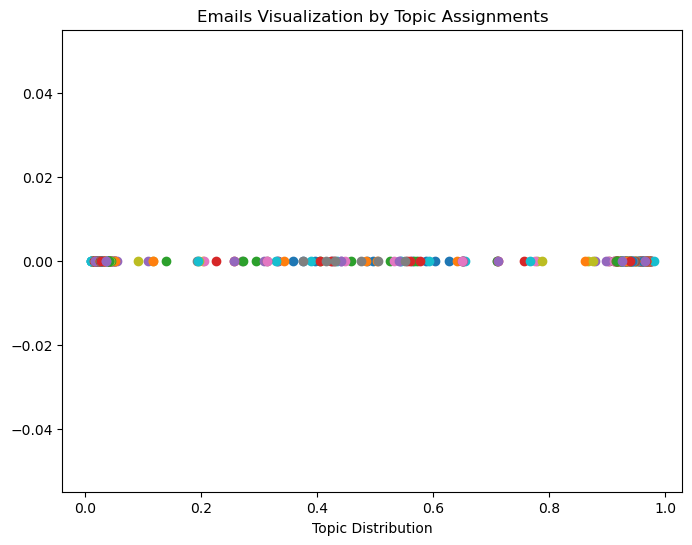

Email      True Topic Predicted Topic
--------------------------------
1          A          C         
2          A          A         
3          A          C         
4          A          B         
5          A          C         
6          A          A         
7          A          C         
8          A          C         
9          A          C         
10         A          A         
11         A          B         
12         A          C         
13         A          C         
14         A          C         
15         A          A         
16         A          C         
17         A          C         
18         A          A         
19         A          C         
20         A          C         
21         A          C         
22         A          A         
23         A          C         
24         A          C         
25         A          A         
26         A          A         
27         A          C         
28         A          A         
29   

In [41]:
# Get topic assignments for each email
topic_assignments = lda.transform(dtm)
topic_labels = np.argmax(topic_assignments, axis=1)

# Plotting
plt.figure(figsize=(8, 6))
for i, topic_distribution in enumerate(topic_assignments):
    plt.scatter(topic_distribution, [0] * len(topic_distribution), label=f"Email {i+1}, Topic {topic_labels[i]+1}")

plt.xlabel("Topic Distribution")
plt.title("Emails Visualization by Topic Assignments")
plt.show()

# Get topic assignments for each email
topic_assignments = lda.transform(dtm)
topic_labels = np.argmax(topic_assignments, axis=1)

# Assign true topics (A, B, C)
true_topics = []
for i in range(len(emails)):
    if i < 62:
        true_topics.append('A')
    elif 62 <= i < 147:
        true_topics.append('B')
    else:
        true_topics.append('C')

# Convert topic labels to predicted topics (adjusting from 0-based index to 1-based index)
predicted_topics = []
for label in topic_labels:
    if label == 0:
        predicted_topics.append('A')
    elif label == 1:
        predicted_topics.append('B')
    elif label == 2:
        predicted_topics.append('C')

# Display the table
print(f"{'Email':<10} {'True Topic':<10} {'Predicted Topic':<10}")
print("-" * 32)
for i in range(len(emails)):
    print(f"{i+1:<10} {true_topics[i]:<10} {predicted_topics[i]:<10}")


In [47]:
# Assign true topics (A, B, C)
true_topics = []
for i in range(len(emails)):
    if i < 62:
        true_topics.append('C')
    elif 62 <= i < 147:
        true_topics.append('B')
    else:
        true_topics.append('A')

# Convert topic labels to predicted topics (adjusting from 0-based index to 1-based index)
predicted_topics = []
for label in topic_labels:
    if label == 0:
        predicted_topics.append('A')
    elif label == 1:
        predicted_topics.append('B')
    elif label == 2:
        predicted_topics.append('C')

# Calculate accuracy for each true topic
true_topic_counts = {'A': 0, 'B': 0, 'C': 0}
correct_predictions = {'A': 0, 'B': 0, 'C': 0}

for true, predicted in zip(true_topics, predicted_topics):
    true_topic_counts[true] += 1
    if true == predicted:
        correct_predictions[true] += 1

accuracy = {}
for topic in true_topic_counts:
    accuracy[topic] = (correct_predictions[topic] / true_topic_counts[topic]) * 100

# Display the accuracy table
print(f"{'True Topic':<12} {'Correctly Classified (%)':<25}")
print("-" * 37)
for topic in accuracy:
    print(f"{topic:<12} {accuracy[topic]:<25.2f}")

True Topic   Correctly Classified (%) 
-------------------------------------
A            64.10                    
B            94.12                    
C            58.06                    


Top words per topic:
Topic 1:
enjoy lets dinner team youre ventilators managing
Topic 2:
ventilator ventilators healthcare care inc efforts play
Topic 3:
enjoy rsvp us next join team could


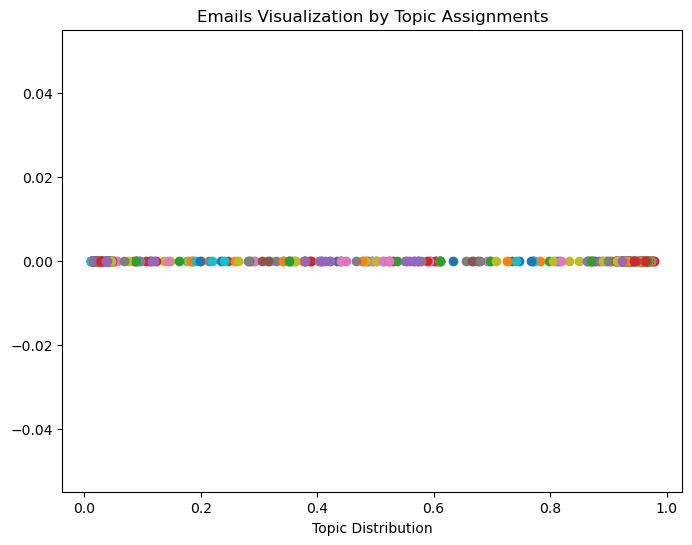

In [50]:
def replace_strings_in_list(lst, replacements):
    """
    Replace strings in a list based on a dictionary of replacements.
    
    Parameters:
    - lst (list): List of strings to be modified.
    - replacements (dict): Dictionary where keys are strings to be replaced and values are replacements.
    
    Returns:
    - list: Modified list with replacements applied.
    """
    modified_list = []
    for item in lst:
        for old_str, new_str in replacements.items():
            item = item.replace(old_str, new_str)
        modified_list.append(item)
    return modified_list

# Dictionary of replacements
replacements = {
    "align": "enjoy",
    "strategies": "dinner",
    "agreeing": "join",
    "coordinate": "play"
}

# Replace strings in the list
modified_emails = replace_strings_in_list(emails, replacements)

# Function to preprocess text
def preprocess_text(text):
    # Lowercase text
    text = text.lower()
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)
    return text

# Preprocess emails
preprocessed_emails = [preprocess_text(email) for email in modified_emails]

# Create document-term matrix
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(preprocessed_emails)

# Topic modeling using LDA
num_topics = 3
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

# Display topics and their top words
def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

n_top_words = 7
print("Top words per topic:")
display_topics(lda, vectorizer.get_feature_names_out(), n_top_words)

# Get topic assignments for each email
topic_assignments = lda.transform(dtm)
topic_labels = np.argmax(topic_assignments, axis=1)

# Plotting
plt.figure(figsize=(8, 6))
for i, topic_distribution in enumerate(topic_assignments):
    plt.scatter(topic_distribution, [0] * len(topic_distribution), label=f"Email {i+1}, Topic {topic_labels[i]+1}")

plt.xlabel("Topic Distribution")
plt.title("Emails Visualization by Topic Assignments")
plt.show()

In [51]:
# Get topic assignments for each email
topic_assignments = lda.transform(dtm)
topic_labels = np.argmax(topic_assignments, axis=1)

# Assign true topics (A, B, C)
true_topics = []
for i in range(len(emails)):
    if i < 62:
        true_topics.append('A')
    elif 62 <= i < 147:
        true_topics.append('B')
    else:
        true_topics.append('C')

# Convert topic labels to predicted topics (adjusting from 0-based index to 1-based index)
predicted_topics = []
for label in topic_labels:
    if label == 0:
        predicted_topics.append('1')
    elif label == 1:
        predicted_topics.append('2')
    elif label == 2:
        predicted_topics.append('3')

# Display the table
print(f"{'Email':<10} {'True Topic':<10} {'Predicted Topic':<10}")
print("-" * 32)
for i in range(len(emails2)):
    print(f"{i+1:<10} {true_topics[i]:<10} {predicted_topics[i]:<10}")


Email      True Topic Predicted Topic
--------------------------------
1          A          2         
2          A          1         
3          A          2         
4          A          2         
5          A          2         
6          A          1         
7          A          2         
8          A          3         
9          A          1         
10         A          3         
11         A          2         
12         A          2         
13         A          1         
14         A          3         
15         A          2         
16         A          1         
17         A          2         
18         A          1         
19         A          1         
20         A          2         
21         A          2         
22         A          2         
23         A          2         
24         A          2         
25         A          2         
26         A          1         
27         A          2         
28         A          1         
29   

In [53]:
# Assign true topics (A, B, C)
true_topics = []
for i in range(len(emails)):
    if i < 62:
        true_topics.append('B')
    elif 62 <= i < 147:
        true_topics.append('C')
    else:
        true_topics.append('A')

# Convert topic labels to predicted topics (adjusting from 0-based index to 1-based index)
predicted_topics = []
for label in topic_labels:
    if label == 0:
        predicted_topics.append('A')
    elif label == 1:
        predicted_topics.append('B')
    elif label == 2:
        predicted_topics.append('C')

# Calculate accuracy for each true topic
true_topic_counts = {'A': 0, 'B': 0, 'C': 0}
correct_predictions = {'A': 0, 'B': 0, 'C': 0}

for true, predicted in zip(true_topics, predicted_topics):
    true_topic_counts[true] += 1
    if true == predicted:
        correct_predictions[true] += 1

accuracy = {}
for topic in true_topic_counts:
    accuracy[topic] = (correct_predictions[topic] / true_topic_counts[topic]) * 100

# Display the accuracy table
print(f"{'True Topic':<12} {'Correctly Classified (%)':<25}")
print("-" * 37)
for topic in accuracy:
    print(f"{topic:<12} {accuracy[topic]:<25.2f}")

True Topic   Correctly Classified (%) 
-------------------------------------
A            33.33                    
B            56.45                    
C            56.47                    
